# EDA
- We will look at US domestic flights from 2019.
- Do some exploratory analysis.
- Maybe finish with ML algorithm to predict delays.

## Datasets
- [Airline database](https://openflights.org/data.html)

In [40]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = 'C:/Users/Zaca/Documents/Datasets/flights/'

In [41]:
# open file (1.3GB so it will be slow)
flights = pd.read_csv(data_path + '2019.csv', index_col=0)

C:\Users\Zaca\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [42]:
# examine top 5 rows
flights.head()

,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,Origin,OriginCityName,OriginState,DestAirportID,Dest,DestCityName,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2019-01-04,OO,5657,14698,SBP,"San Luis Obispo, CA",CA,14771,SFO,"San Francisco, CA",...,0.0,70.0,51.0,37.0,190.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-04,OO,5658,12266,IAH,"Houston, TX",TX,15919,XNA,"Fayetteville, AR",...,0.0,103.0,109.0,76.0,438.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-04,OO,5658,14783,SGF,"Springfield, MO",MO,12266,IAH,"Houston, TX",...,0.0,132.0,121.0,88.0,513.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-04,OO,5659,12389,ISN,"Williston, ND",ND,11292,DEN,"Denver, CO",...,0.0,118.0,110.0,80.0,576.0,0.0,0.0,0.0,0.0,0.0
4,2019-01-04,OO,5660,13342,MKE,"Milwaukee, WI",WI,11292,DEN,"Denver, CO",...,0.0,184.0,163.0,127.0,896.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# examine dtypes
flights.dtypes

FlightDate                          object
Reporting_Airline                   object
Flight_Number_Reporting_Airline      int64
OriginAirportID                      int64
Origin                              object
OriginCityName                      object
OriginState                         object
DestAirportID                        int64
Dest                                object
DestCityName                        object
DestState                           object
CRSDepTime                           int64
DepTime                            float64
DepDelay                           float64
TaxiOut                            float64
WheelsOff                          float64
WheelsOn                           float64
TaxiIn                             float64
CRSArrTime                           int64
ArrTime                            float64
ArrDelay                           float64
Cancelled                          float64
Diverted                           float64
CRSElapsedT

In [44]:
print(flights.shape[0])

7422037


### Holy sh!t there are 7.4 million flights in our dataset.
- Let's try to look at the first few columns.

1. Flight date is in object format, let's turn in into date-time for timeseries analysis.
2. Reporting airline are abbreviated (IATA codes), we need to find an actual human name for them.

## Airlines

In [45]:
# loot at unique values for Airlines.
airlines = flights.Reporting_Airline.unique()
print(airlines)

# there's only 17 of them... megacorporations...

['OO' 'AS' '9E' 'AA' 'MQ' 'WN' 'G4' 'OH' 'B6' 'NK' 'DL' 'YV' 'EV' 'F9'
 'YX' 'UA' 'HA']


In [46]:
# I found an Airline dataset we can try to use to translate IATA codes.
airlines_ds = pd.read_csv(data_path + 'world_airlines.csv', index_col=0, names=['NAME', 'ALIAS', 'IATA', 'ICAO', 'CALLSIGN', 'COUNTRY', 'ACTIVE'])

In [47]:
# we can make a dictionary to translate codes to actual names
airline_dictionary = {k:airlines_ds.loc[airlines_ds.IATA == k, 'NAME'].values[0] for k in airlines}
airline_dictionary

{'OO': 'SkyWest',
 'AS': 'Alaska Airlines',
 '9E': 'Pinnacle Airlines',
 'AA': 'American Airlines',
 'MQ': 'American Eagle Airlines',
 'WN': 'Southwest Airlines',
 'G4': 'Allegiant Air',
 'OH': 'Comair',
 'B6': 'JetBlue Airways',
 'NK': 'Spirit Airlines',
 'DL': 'Delta Air Lines',
 'YV': 'Mesa Airlines',
 'EV': 'Atlantic Southeast Airlines',
 'F9': 'Frontier Airlines',
 'YX': 'Midwest Airlines',
 'UA': 'United Airlines',
 'HA': 'Hawaiian Airlines'}

In [48]:
# ok this was beautiful.
# let's look at the share of flights between them.
flights.Reporting_Airline.value_counts(normalize=True)

WN    0.183770
DL    0.133654
AA    0.127563
OO    0.112697
UA    0.084331
YX    0.044348
MQ    0.044059
B6    0.040071
OH    0.038979
AS    0.035680
9E    0.034644
YV    0.030704
NK    0.027600
F9    0.018262
EV    0.018146
G4    0.014188
HA    0.011303
Name: Reporting_Airline, dtype: float64

In [49]:
# let's have our first plot shall we?
flights.Reporting_Airline.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=30)

# i will make them beautiful later.

## Dates

In [53]:
flights.FlightDate.dtypes

dtype('O')

In [54]:
# Our flight date is still an object, let's change it to datetime.
flights.FlightDate = pd.to_datetime(flights.FlightDate)

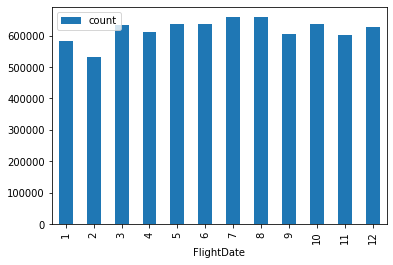

In [63]:

monthly_flights = flights.groupby(flights.FlightDate.dt.month).agg(count=('FlightDate', 'count'))
monthly_flights.plot(kind="bar")

We could explore this dataset forever, I still kind of want to, but let's get to what matters
# Delays